In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import confusion_matrix, roc_auc_score

In [2]:
df = pd.read_csv('../../datasets/model.csv', index_col = [0])

In [3]:
df.head()

,posteam_type,yardline_100,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,drive,qtr,goal_to_go,ydstogo,desc,...,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,penalty,pass,run,4th_down_conversion
329,1.0,64.0,292.0,292.0,292.0,22,4,0.0,10,"(4:52) (No Huddle, Shotgun) B.Quinn pass incom...",...,0.152689,0.002840,0.215235,0.112044,0.003619,0.134403,0.0,1,0,0.0
395,0.0,4.0,851.0,851.0,2651.0,8,2,0.0,1,"(14:11) Kv.Smith left end for 4 yards, TOUCHDOWN.",...,0.021944,0.000079,0.035875,0.805946,0.002883,0.121512,0.0,0,1,1.0
516,0.0,64.0,378.0,378.0,378.0,25,4,0.0,1,(6:18) (Pass formation) M.Stafford pass short ...,...,0.153133,0.002288,0.228940,0.086751,0.003595,0.231910,0.0,1,0,1.0
676,1.0,26.0,464.0,464.0,464.0,19,4,0.0,7,(7:44) (Shotgun) B.Leftwich pass incomplete sh...,...,0.060039,0.000437,0.089903,0.599755,0.004226,0.132362,0.0,1,0,0.0
697,1.0,2.0,91.0,91.0,91.0,21,4,1.0,2,(1:31) B.Leftwich pass short right to K.Winslo...,...,0.012643,0.000971,0.008474,0.656673,0.001979,0.128562,0.0,1,0,1.0


In [4]:
df['4th_down_conversion'].value_counts()

0.0    2438
1.0    2338
Name: 4th_down_conversion, dtype: int64

In [5]:
df['4th_down_conversion'].value_counts(normalize = True)

0.0    0.510469
1.0    0.489531
Name: 4th_down_conversion, dtype: float64

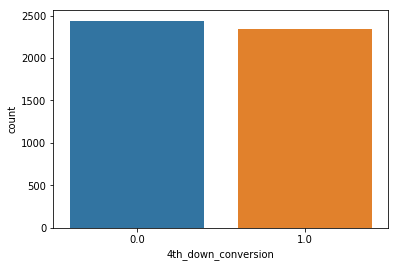

In [6]:
sns.countplot(df['4th_down_conversion']);

In [7]:
X = df[['ydstogo', 'run', 'td_prob', 'goal_to_go']]
y = df['4th_down_conversion']

In [8]:
def classification_machine(estimators, X, y):
    X = df[['ydstogo', 'run', 'td_prob', 'goal_to_go']]
    y = df['4th_down_conversion']
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)


    ss=StandardScaler()
    ss.fit(X_train)
    X_train_scaled = ss.transform(X_train)
    X_test_scaled = ss.transform(X_test)
    estimators = [estimators]
    for e in estimators:
        est = e()
        est.fit(X_train_scaled, y_train)
        train_score = est.score(X_train_scaled, y_train)
        r_sq = est.score(X_test_scaled, y_test)
        preds= est.predict(X_test_scaled)
        print(train_score, r_sq)

    return ["our training data has an r^2 of {} while our testing data has an r^2 of {}".format(train_score, r_sq)]

In [9]:
log = LogisticRegression

In [10]:
classification_machine(log, X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.6233947515354551 0.6549413735343383


['our training data has an r^2 of 0.6233947515354551 while our testing data has an r^2 of 0.6549413735343383']

In [11]:
knn = KNeighborsClassifier

In [12]:
classification_machine(knn, X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.


0.7174762702400893 0.5703517587939698


['our training data has an r^2 of 0.7174762702400893 while our testing data has an r^2 of 0.5703517587939698']

In [13]:
rf = RandomForestClassifier

In [14]:
classification_machine(rf, X, y)

0.9494695700725851 0.550251256281407


/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


['our training data has an r^2 of 0.9494695700725851 while our testing data has an r^2 of 0.550251256281407']

In [15]:
et = ExtraTreesClassifier

In [16]:
classification_machine(et, X, y)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # Remove the CWD from sys.path while we load stuff.
/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9916247906197655 0.5586264656616415


['our training data has an r^2 of 0.9916247906197655 while our testing data has an r^2 of 0.5586264656616415']

# Confusion Matrices and ROCs of Logistic Regression

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [18]:
log = LogisticRegression()

In [19]:
log.fit(X_train, y_train)

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
preds = log.predict(X_test)

In [21]:
confusion_matrix(y_test, preds)  

array([[391, 247],
       [167, 389]])

In [22]:
tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()

In [23]:
# What is the specificity of our test set?

spec = tn / (tn + fp)

# sPecificity = TN / all negatives = TN / (TN + FP)

print(f'Specificity: {round(spec,4)}')

Specificity: 0.6129


In [24]:
# What is the sensitivity of our test set?

sens = tp / (tp + fn)

# seNsitivity = TP / all positives = TP / (TP + FN)

print(f'Sensitivity: {round(sens,4)}')

Sensitivity: 0.6996


In [25]:
# What is the accuracy of our test set?
acc = (tp + tn) / (tp + tn + fp + fn)

print(f'Accuracy: {round(sens,4)}')

Accuracy: 0.6996


In [26]:
pred_proba = [i[1] for i in log.predict_proba(X_test)]

pred_df = pd.DataFrame({'true_values': y_test,
                        'pred_probs':pred_proba})

In [27]:
pred_df.head()

,true_values,pred_probs
2724,1.0,0.239518
44543,1.0,0.665043
257237,1.0,0.508753
300830,0.0,0.572234
376804,1.0,0.573184


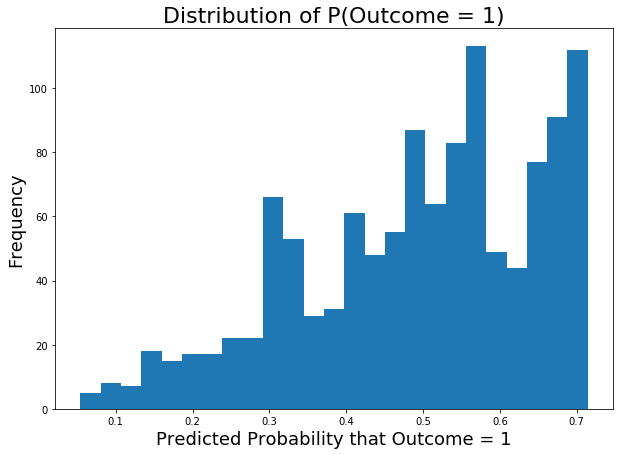

In [28]:
# Create figure.
plt.figure(figsize = (10,7))

# Create histogram of observations.
plt.hist(pred_df['pred_probs'], bins=25)

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18);

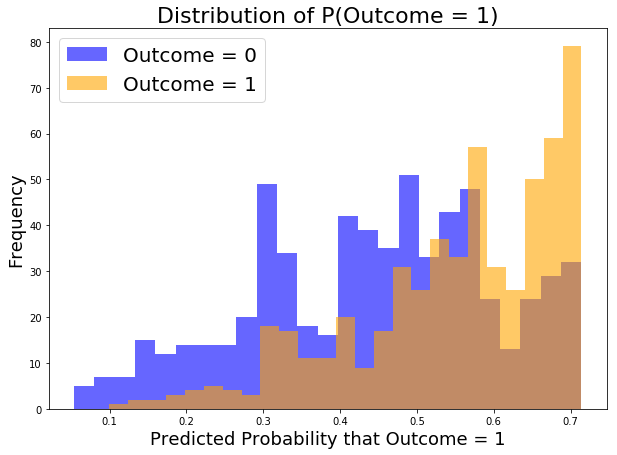

In [29]:
# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

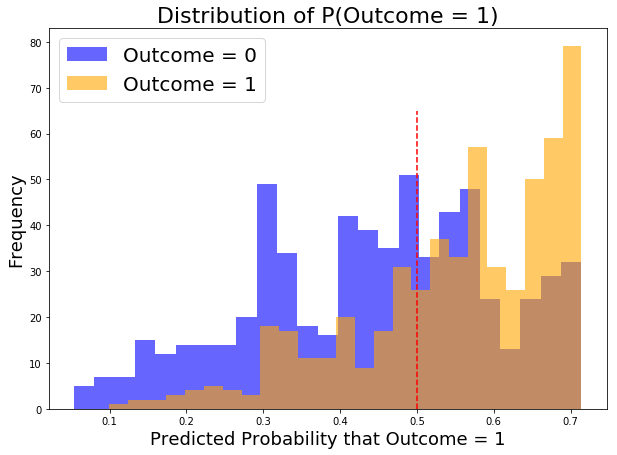

In [30]:

# Create figure.
plt.figure(figsize = (10,7))

# Create two histograms of observations.
plt.hist(pred_df[pred_df['true_values'] == 0]['pred_probs'],
         bins=25,
         color='b',
         alpha = 0.6,
         label='Outcome = 0')
plt.hist(pred_df[pred_df['true_values'] == 1]['pred_probs'],
         bins=25,
         color='orange',
         alpha = 0.6,
         label='Outcome = 1')

# Add vertical line at P(Outcome = 1) = 0.5.
plt.vlines(x=0.5,
           ymin = 0,
           ymax = 65,
           color='r',
           linestyle = '--')

# Label axes.
plt.title('Distribution of P(Outcome = 1)', fontsize=22)
plt.ylabel('Frequency', fontsize=18)
plt.xlabel('Predicted Probability that Outcome = 1', fontsize=18)

# Create legend.
plt.legend(fontsize=20);

In [31]:
roc_auc_score(pred_df['true_values'], pred_df['pred_probs'])

0.7020097088473422

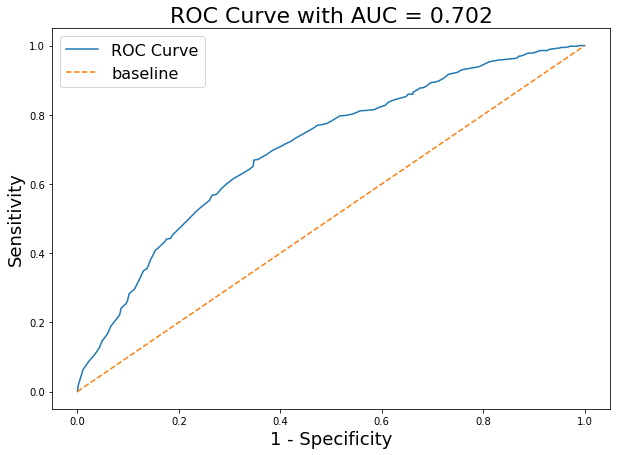

In [32]:
# Create figure.
plt.figure(figsize = (10,7))

# Create threshold values. (Dashed red line in image.)
thresholds = np.linspace(0, 1, 200)

# Define function to calculate sensitivity. (True positive rate.)
def TPR(df, true_col, pred_prob_col, threshold):
    true_positive = df[(df[true_col] == 1) & (df[pred_prob_col] >= threshold)].shape[0]
    false_negative = df[(df[true_col] == 1) & (df[pred_prob_col] < threshold)].shape[0]
    return true_positive / (true_positive + false_negative)
    
# Define function to calculate 1 - specificity. (False positive rate.)
def FPR(df, true_col, pred_prob_col, threshold):
    true_negative = df[(df[true_col] == 0) & (df[pred_prob_col] <= threshold)].shape[0]
    false_positive = df[(df[true_col] == 0) & (df[pred_prob_col] > threshold)].shape[0]
    return 1 - (true_negative / (true_negative + false_positive))
    
# Calculate sensitivity & 1-specificity for each threshold between 0 and 1.
tpr_values = [TPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]
fpr_values = [FPR(pred_df, 'true_values', 'pred_probs', prob) for prob in thresholds]

# Plot ROC curve.
plt.plot(fpr_values, # False Positive Rate on X-axis
         tpr_values, # True Positive Rate on Y-axis
         label='ROC Curve')

# Plot baseline. (Perfect overlap between the two populations.)
plt.plot(np.linspace(0, 1, 200),
         np.linspace(0, 1, 200),
         label='baseline',
         linestyle='--')

# Label axes.
plt.title(f'ROC Curve with AUC = {round(roc_auc_score(pred_df["true_values"], pred_df["pred_probs"]),3)}', fontsize=22)
plt.ylabel('Sensitivity', fontsize=18)
plt.xlabel('1 - Specificity', fontsize=18)

# Create legend.
plt.legend(fontsize=16);